## K-Means analysis on Cancer Dataset

### Group-3 
####  Anuth Karithalackal Asokan C0808934
####  Pavan Kumar C0805086
####  Sai Venkata Someshwara Sarma Varahabatla C0806021
####  Sushmita Siwakoti C0785589

#### **Clustering** in unsupervised learning means grouping together a set of objects in such a way that the objects in the same cluster are more similar to each other than to objects in other clusters. The similarity is a metric that reflects the strength of the relationship between two data objects. Clustering is mainly used for exploratory data mining. It has various usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

#### K-Means is very popular clustering technique.

#### Using this dataset, we hope to understand various characteristics of a type of cancer and find which can indicate a chance of having that type of cancer. In this case, we are focusing on two types of cancer Benign and Malignant tumors. As part of the predictive analysis, we will build a model that predicts the type of cancer the next patient can have. We hope that this analysis will help people in the future to have a better and faster diagnosis of cancer.

In [75]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import preprocessing
from subprocess import check_output

In [76]:
## Import Dataset
df_cancer = pd.read_csv("./cancer.csv")
df_cancer

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [77]:
## deleting if any duplicate rows
df_cancer = df_cancer.drop_duplicates(subset ='id',keep = 'first')
df_cancer

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
677,763235,3,1,1,1,2,1,2,1,2,2
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4


In [78]:
##checking for any missing values
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 681
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 630 non-null    int64
 1   Clump Thickness    630 non-null    int64
 2   UofCSize           630 non-null    int64
 3   UofCShape          630 non-null    int64
 4   Marginal Adhesion  630 non-null    int64
 5   SECSize            630 non-null    int64
 6   Bare Nuclei        630 non-null    int64
 7   Bland Chromatin    630 non-null    int64
 8   Normal Nucleoli    630 non-null    int64
 9   Mitoses            630 non-null    int64
 10  Class              630 non-null    int64
dtypes: int64(11)
memory usage: 59.1 KB


##### We can observe that all are non-null values

In [79]:
## Removing unwanted columns from the dataset
df_cancer = df_cancer.drop('id',axis=1)
df_cancer

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
677,3,1,1,1,2,1,2,1,2,2
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4


In [80]:
## From the description, it is clear that the value 4 in the Class column indicates Malignant and 2 indicates
## Benign cancer. As our objective is to understand these two types of cancer, we are modifying the values to
## standards for better analysis.

df_cancer["Class"] = df_cancer["Class"].replace([4],1) ## indicates Malignant
df_cancer["Class"] = df_cancer["Class"].replace([2],0) ## indicates Benign
df_cancer

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
677,3,1,1,1,2,1,2,1,2,0
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1


In [81]:
## As we can see from above that different columns are showing different ranges of values, so we are scaling
## the values of each column to standards.

df_cancers = pd.DataFrame(preprocessing.scale(df_cancer.iloc[:,1:10]))
df_cancers.columns = list(df_cancer.iloc[:,1:10].columns)
df_cancers['Class'] = df_cancer['Class']

# Creating the high dimensional feature space X
df_cancer_drop = df_cancers.drop('Class',axis=1)
X = df_cancer_drop.values

In [82]:
## TSNE or t-distributed Stochastic Neighbor Embedding is a tool to visualize high dimentional data. It converts
## similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler
## divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 630 samples in 0.001s...
[t-SNE] Computed neighbors for 630 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 630 / 630
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.861198
[t-SNE] KL divergence after 2950 iterations: 0.537120


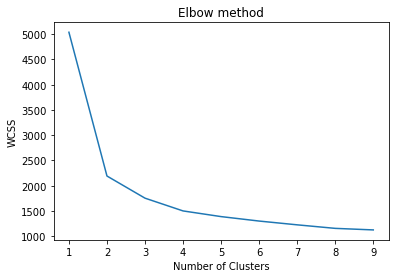

In [83]:
#Building the Model
# We are using KMeans Algorithm to decide the optimum cluster number. By using Elbow Mmethod,
# we can figure out K for KMeans.

from sklearn.cluster import KMeans
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

##### We can observe that the last elbow is at cluster 2. So, we can assume that the number of clusters we going to use is 2.

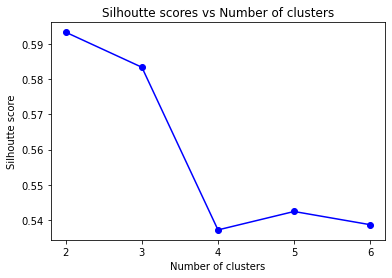

In [84]:
## We can further confirm the cluster number by calculating and comparing the silhoutte coefficient with other
## clusters using Silhoutte method. We will test with cluster numbers 3,4,5,6.

from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:6]]
plt.plot(range(2,7), silhoutte_scores, "bo-") ## Plotting silhoutte scores against cluster numbers
plt.xticks([2, 3, 4, 5, 6])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

##### We can clearly see that cluster number 2 has the highest score thereby, confirming the number of clusters we will use in the analysis is 2.

In [85]:
## Calculating the silhoutte score of cluster number 2

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X)

print('Silhoutte score of our model is ' + str(silhouette_score(X, kmeans.labels_)))

Silhoutte score of our model is 0.5933374303763801


Text(0.5, 1.0, 'Actual clusters')

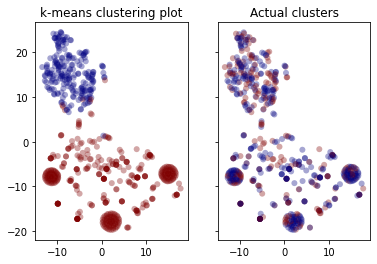

In [86]:
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = df_cancers['Class'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

#### Now, we have plotted the k-means clustering lets evaluate our model and get inference

In [87]:
## Assigning labels as cluster index to the dataset.
df_cancer['cluster_id'] = kmeans.labels_

In [88]:
import seaborn as sns

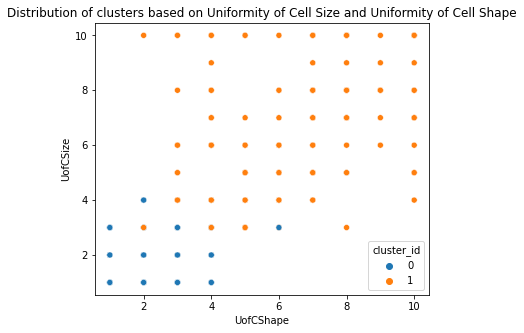

In [101]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_cancer, x='UofCShape', y='UofCSize', hue='cluster_id')
plt.title('Distribution of clusters based on Uniformity of Cell Size and Uniformity of Cell Shape')
plt.show()

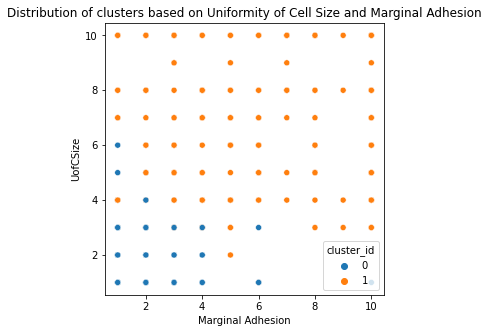

In [102]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_cancer, x='Marginal Adhesion', y='UofCSize', hue='cluster_id')
plt.title('Distribution of clusters based on Uniformity of Cell Size and Marginal Adhesion')
plt.show()

##### From the above two plots, we can observe that our model has clustered Benign tumor with lowers values and Malignant tumor with higher values of each feature. The cluster is well segmented between higher values and lower values.